Advanced Hypothesis Testing

Resources:

Medical Insurance Cost Prediction. (n.d.). Www.kaggle.com. Retrieved March 25, 2024, from https://www.kaggle.com/datasets/rahulvyasm/medical-insurance-cost-prediction/code
‌

Github link:

https://github.com/FMJM401/DSC510-week-6/tree/main/Advanced%20Hypothesis%20Testing 

Video Link:

https://www.youtube.com/watch?v=fAXe1jv7q1I

This assignment aims to enhance proficiency in statistical analysis and hypothesis testing in Python utilizing real-world datasets to conduct hypothesis tests for paired data, multiple population means, and variance comparison, cultivating a deeper understanding of the statistical method's limitation and reliability through exploring assumptions, potential consequences of violating them, and their remedies.

Task 1: Paired Data Analysis
- Find a suitable dataset with paired data from a reliable source.
- Write a Jupyter notebook to import the dataset and perform a hypothesis test for paired data.
- Explain the problem, data, research question, and the appropriate statistical test that you would use to address the research question.
- Discuss the assumptions underlying the hypothesis test, potential consequences of violating these assumptions, and possible remedies.
- Propose a Python tool to assist with the interpretation of the results of the statistical test and visualizations.
- Record a 3- to 4-minute video explaining the analysis, results, and interpretation of the hypothesis test.

Task 2: Multiple Population Means Analysis
- Find a suitable dataset with more than two populations means from a reliable source.
- Continuing in the same Jupyter notebook, write a code to import the dataset and perform a hypothesis test for more than two population means.
- Explain the problem, data, research question, and the appropriate statistical test that you would use to address the research question.
- Discuss the assumptions underlying the hypothesis test, potential consequences of violating these assumptions, and possible remedies.
- Propose a Python tool to assist with the interpretation of the results of the statistical test and visualizations.
- Record a 3- to 4-minute video explaining the analysis, results, and interpretation of the hypothesis test.

Task 3: Variance Comparison Analysis
- Find a suitable dataset with two or more populations with variances to compare from a reliable source.
- Continuing in the same Jupyter notebook, write a code to import the dataset and perform a hypothesis test for variance comparison.
- Explain the problem, data, research question, and the appropriate statistical test that you would use to address the research question.
- Discuss the assumptions underlying the hypothesis test, potential consequences of violating these assumptions, and possible remedies.
- Propose a Python tool to assist with the interpretation of the results of the statistical test and visualizations.
- Record a 3- to 4-minute video explaining the analysis, results, and interpretation of the hypothesis test.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import f_oneway
import statistics

/var/folders/x1/3h80s1d10bx2rgftf2cxmc980000gn/T/ipykernel_9728/1496544326.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df = pd.read_csv('medical_insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Problem:
Medical Insurance Cost?


Research Question:
How much does Medical Insurance Cost?


Task 1: Paired Data Analysis

In [10]:
mean_smoker_charges=[3223.139]
mean_non_smoker_charges =[8417.8744]

In [11]:
#Charges mean between smokers and non smokers
smoker_charges = df[df["smoker"] == "yes"]["charges"]
non_smoker_charges = df[df["smoker"] == "no"]["charges"]

#mean value calulations
mean_smoker_charges = smoker_charges.mean()
mean_non_smoker_charges = non_smoker_charges.mean()

#means printed
print(f"Mean charges for smokers: {mean_smoker_charges}")
print(f"Mean charges for non-smokers: {mean_non_smoker_charges}")

Mean charges for smokers: 32223.139763617022
Mean charges for non-smokers: 8417.8744111404


In [12]:
stats.ttest_rel(mean_smoker_charges,mean_non_smoker_charges)

TtestResult(statistic=nan, pvalue=nan, df=0)

Bar graph

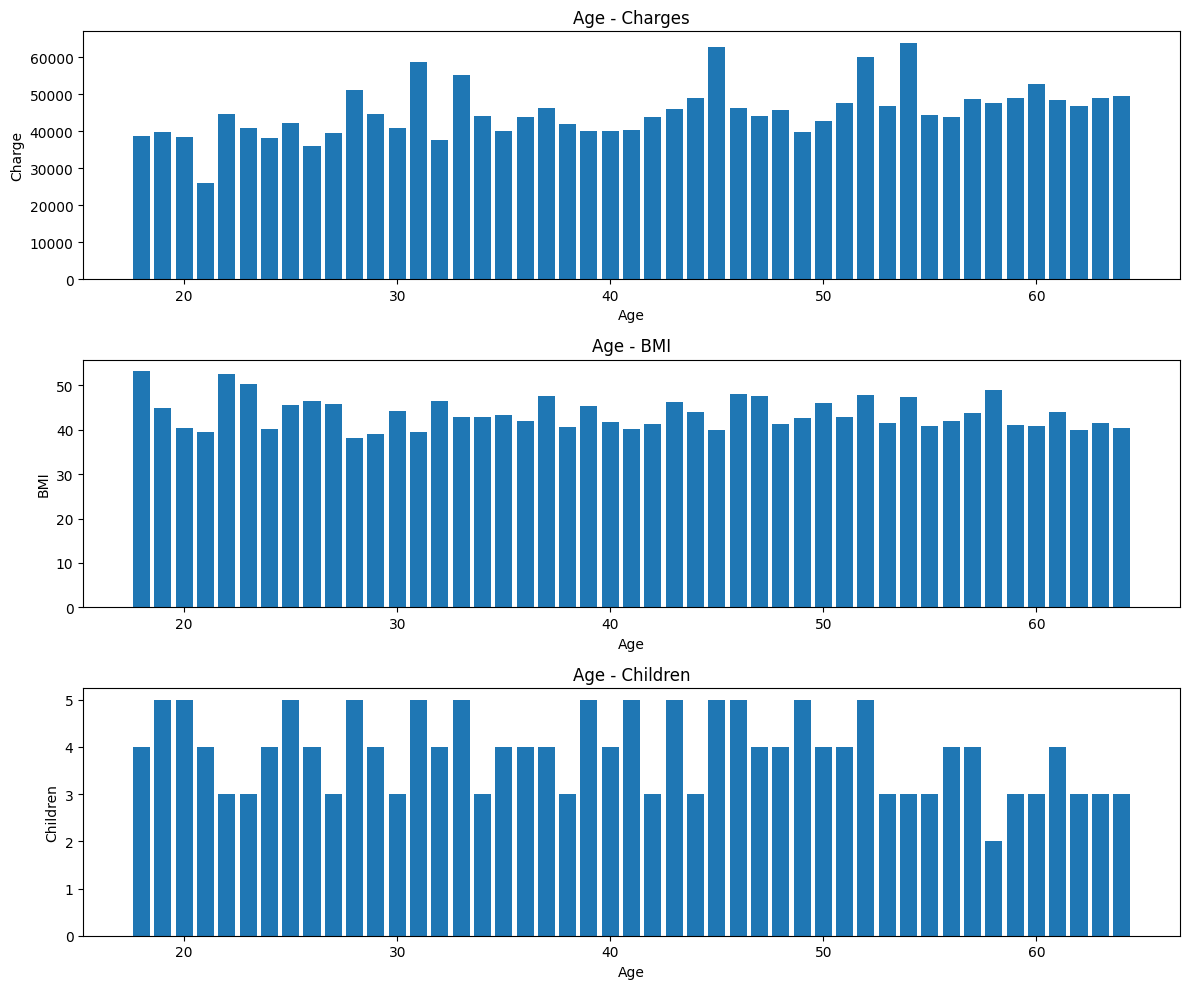

In [30]:
#subplots bar
fig, axs = plt.subplots(3, figsize=(12,10))

axs[0].bar(df['age'], df['charges'])
axs[0].set_title('Age - Charges')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Charge')

axs[1].bar(df['age'], df['bmi'])
axs[1].set_title('Age - BMI')
axs[1].set_xlabel('Age')
axs[1].set_ylabel('BMI')

axs[2].bar(df['age'], df['children'])
axs[2].set_title('Age - Children')
axs[2].set_xlabel('Age')
axs[2].set_ylabel('Children')

plt.tight_layout()

plt.show()

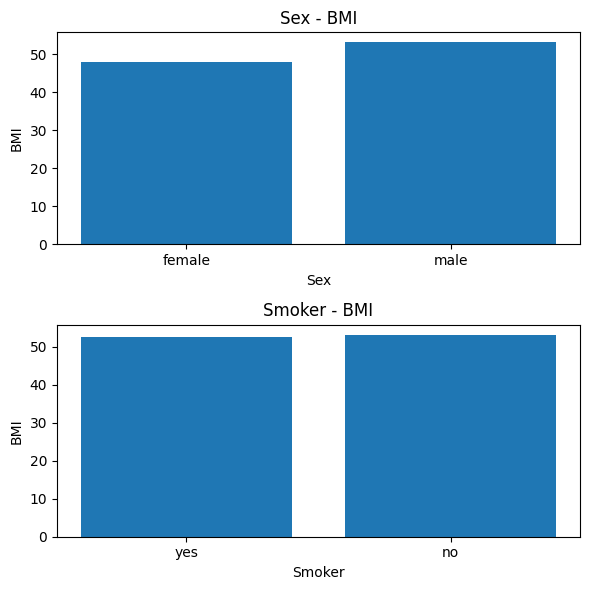

In [31]:
#subplots bar
fig, axs = plt.subplots(2, figsize=(6,6))

axs[0].bar(df['sex'], df['bmi'])
axs[0].set_title('Sex - BMI')
axs[0].set_xlabel('Sex')
axs[0].set_ylabel('BMI')

axs[1].bar(df['smoker'], df['bmi'])
axs[1].set_title('Smoker - BMI')
axs[1].set_xlabel('Smoker')
axs[1].set_ylabel('BMI')

plt.tight_layout()

plt.show()

Box plots

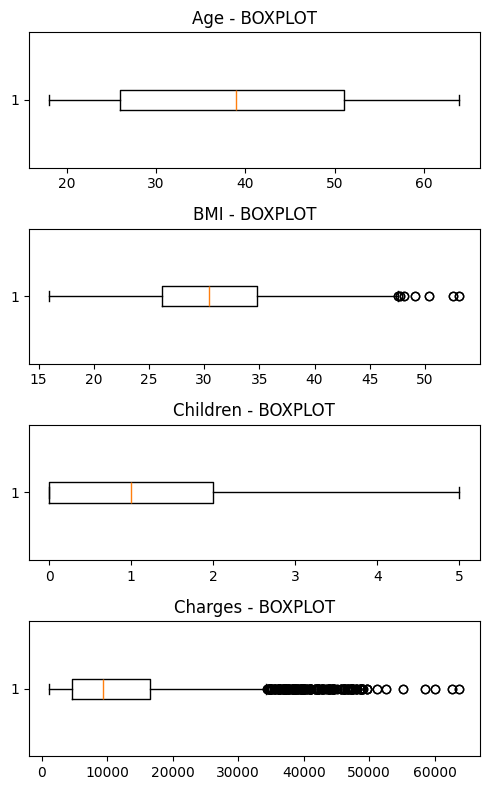

In [32]:
#subploits boxplots
fig, axs = plt.subplots(4, figsize=(5,8))

axs[0].boxplot(df['age'], vert=False)
axs[0].set_title('Age - BOXPLOT')

axs[1].boxplot(df['bmi'], vert=False)
axs[1].set_title('BMI - BOXPLOT')

axs[2].boxplot(df['children'], vert=False)
axs[2].set_title('Children - BOXPLOT')

axs[3].boxplot(df['charges'], vert=False)
axs[3].set_title('Charges - BOXPLOT')

plt.tight_layout()

plt.show()

Task 2: Multiple Population Means Analysis

In [33]:
#female and male smokers
df.groupby(['smoker', 'sex']).size().unstack()

sex,female,male
smoker,,
no,1134,1074
yes,232,332


Task 3: Variance Comparison Analysis

In [46]:
#variance and mean for smoker charges
sc = statistics.mean(smoker_charges)
print(statistics.variance(smoker_charges, xbar = -100))


1179380519.0530982


In [47]:
#variance and mean for  non-smoker charges
nsc = statistics.mean(non_smoker_charges)
print(statistics.variance(non_smoker_charges, xbar = -100))

108774119.93998612
